# LOCALITY SPECIFIC INFORMATION

Here we calculate useful information regarding unique locations in the data set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
world = geopandas.read_file('../geopandas/world_m.shp')
# coordinate reference system = epsg 4326, 
# tells how coordinates translate to points on the map
world = world.to_crs(epsg=4326)

df = pd.read_csv('../csv/NOW_dataframe_cleaned.csv', index_col=0)
speciesFirstOccurrence = pd.read_csv('../csv/speciesFirstOccurrence.csv', index_col=0)
speciesLastOccurrence = pd.read_csv('../csv/speciesLastOccurrence.csv', index_col=0)

pd.set_option('max_columns',100)

In [2]:
# create a dataframe where you collect locality specific info

# pre-allocate
rowLabels = df['LIDNUM'].unique().astype(int)
columnLabels = ['LAT','LONG','TIMEUNIT','NUMBER OF FIRST OCCURRENCES','NUMBER OF LAST OCCURRENCES','NUMBER OF OCCURRENCES','PROPORTION OF FIRST OCCURRENCES','PROPORTION OF LAST OCCURRENCES']
zeroMatrix = np.zeros((len(rowLabels),len(columnLabels)))
localityFeatures = pd.DataFrame(zeroMatrix.copy(), index=rowLabels, columns=columnLabels)
localityFeatures.index.name = 'LIDNUM'

# calculate info for each locality
for ix in localityFeatures.index:
    singleLocation = df.loc[df['LIDNUM']==ix]
    localityFeatures.loc[ix,'LAT'] = singleLocation.iloc[0]['LAT']
    localityFeatures.loc[ix,'LONG'] = singleLocation.iloc[0]['LONG']
    localityFeatures.loc[ix,'TIMEUNIT'] = singleLocation.iloc[0]['TIMEUNIT']
    for ix2 in singleLocation.index:
        # add 0 or 1 to 'NUMBER OF FIRST OCCURRENCES' depending on whether the focal species is new or not
        localityFeatures.loc[ix,'NUMBER OF FIRST OCCURRENCES'] += speciesFirstOccurrence.loc[singleLocation.loc[ix2,'ID'], singleLocation.loc[ix2,'TIMEUNIT']]        
        # add 0 or 1 to 'NUMBER OF LAST OCCURRENCES' depending on whether the focal species is dying or not
        localityFeatures.loc[ix,'NUMBER OF LAST OCCURRENCES'] += speciesLastOccurrence.loc[singleLocation.loc[ix2,'ID'], singleLocation.loc[ix2,'TIMEUNIT']]        
    localityFeatures.loc[ix,'NUMBER OF OCCURRENCES'] = singleLocation.shape[0]    
    localityFeatures.loc[ix,'PROPORTION OF FIRST OCCURRENCES'] = localityFeatures.loc[ix,'NUMBER OF FIRST OCCURRENCES'] / localityFeatures.loc[ix,'NUMBER OF OCCURRENCES']    
    localityFeatures.loc[ix,'PROPORTION OF LAST OCCURRENCES'] = localityFeatures.loc[ix,'NUMBER OF LAST OCCURRENCES'] / localityFeatures.loc[ix,'NUMBER OF OCCURRENCES']    
           
display(localityFeatures.head())   
display(localityFeatures.shape)

LAT        LONG TIMEUNIT  NUMBER OF FIRST OCCURRENCES  \
LIDNUM                                                                
21390   47.383000    8.050000      MN6                          1.0   
27232   33.250000  102.416667     MQ19                          1.0   
27955   39.209991   -1.544182     MN15                          0.0   
26550   38.516667   46.533333     MN12                          0.0   
28578   41.532600    1.788000    MN7-8                          3.0   

        NUMBER OF LAST OCCURRENCES  NUMBER OF OCCURRENCES  \
LIDNUM                                                      
21390                          1.0                    1.0   
27232                          3.0                    3.0   
27955                          2.0                    4.0   
26550                          0.0                    1.0   
28578                          3.0                    9.0   

        PROPORTION OF FIRST OCCURRENCES  PROPORTION OF LAST OCCURRENCES  
LIDNUM                                                                   
21390                          1.000000                        1.000000  
27232                          0.333333                        1.000000  
27955                          0.000000                        0.500000  
26550                          0.000000                        0.000000  
28578                          0.333333                        0.333333

(5360, 8)

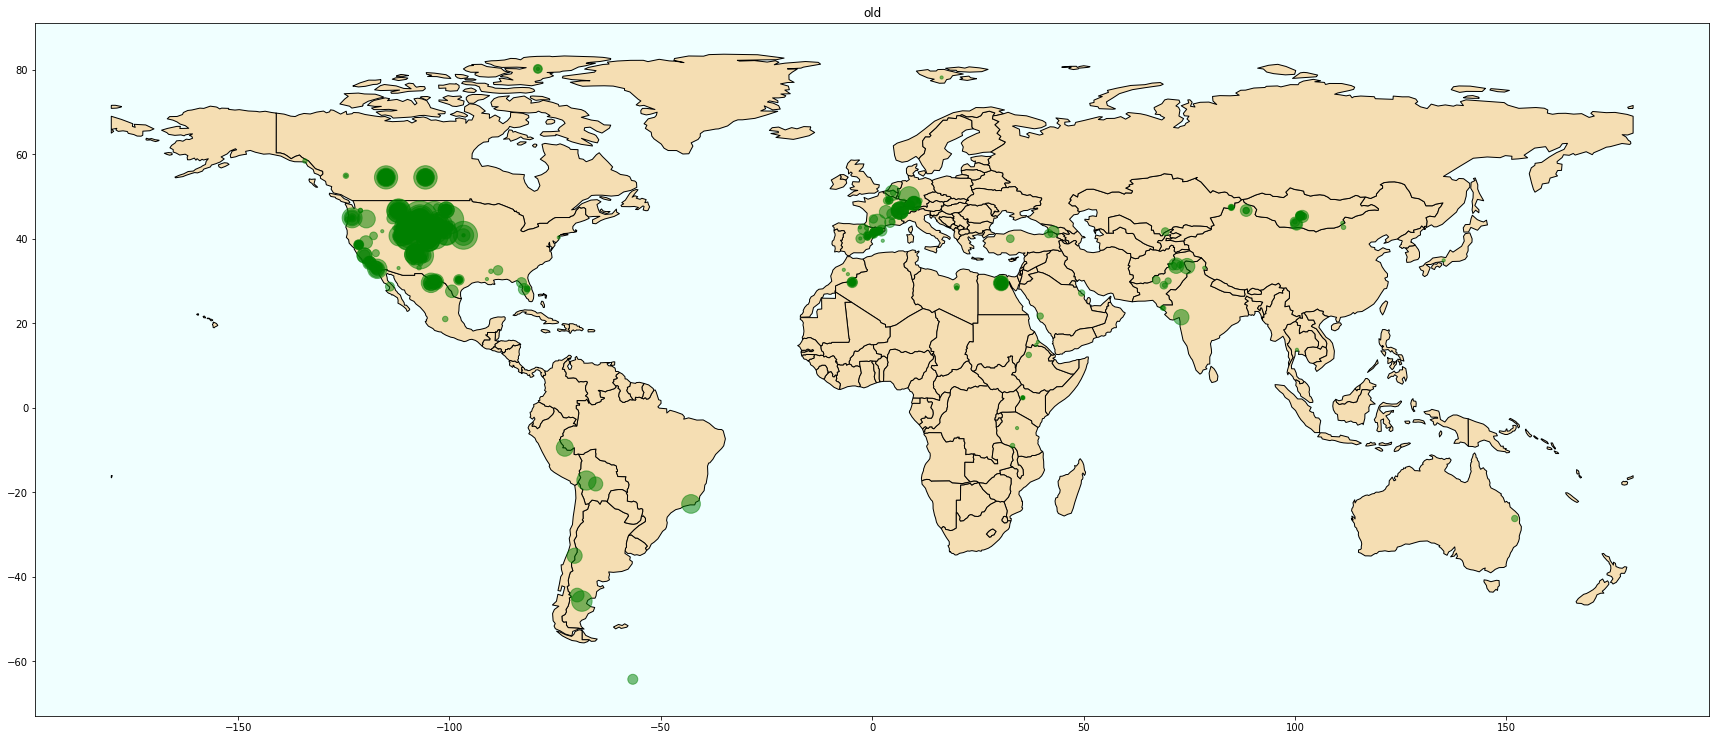

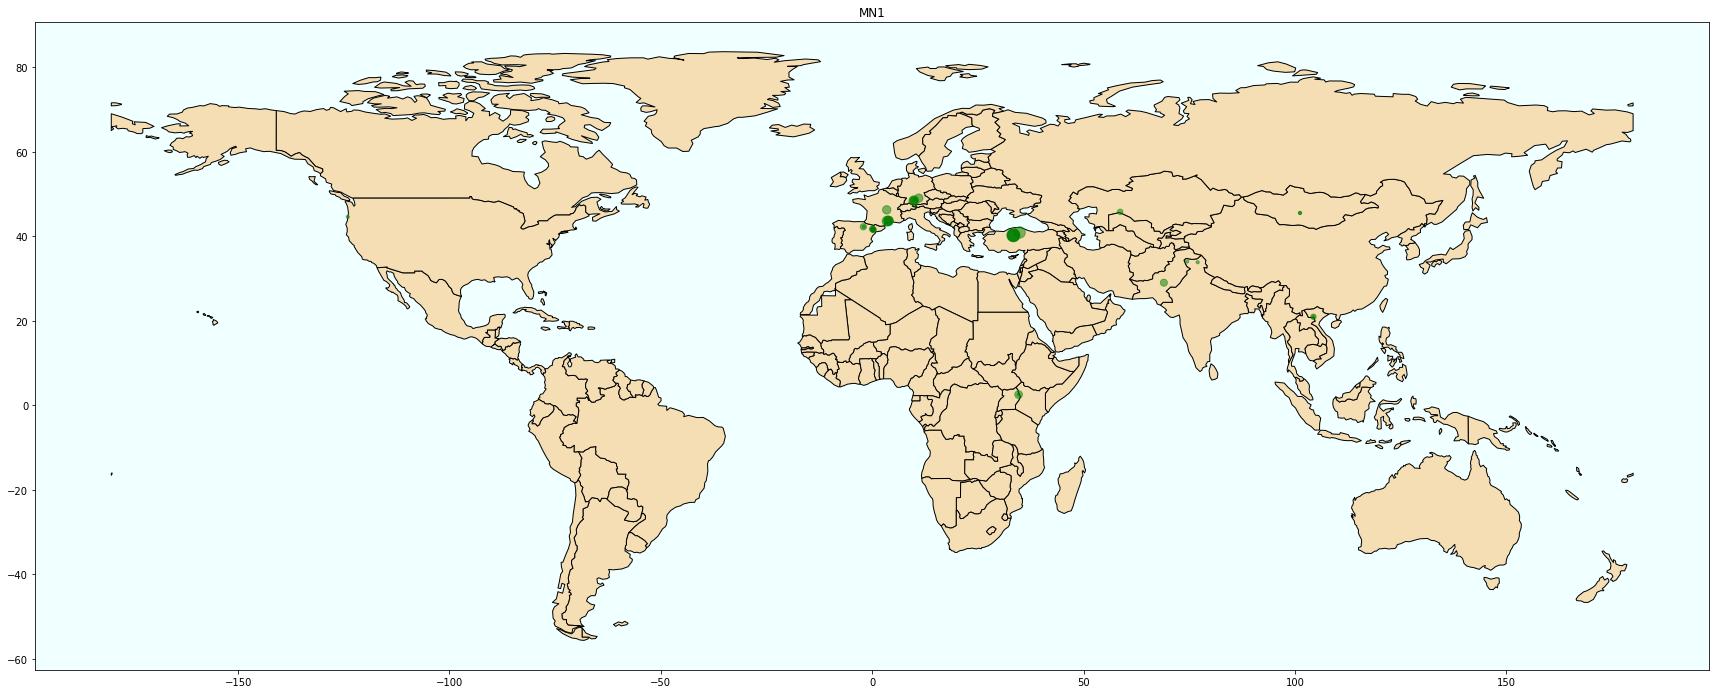

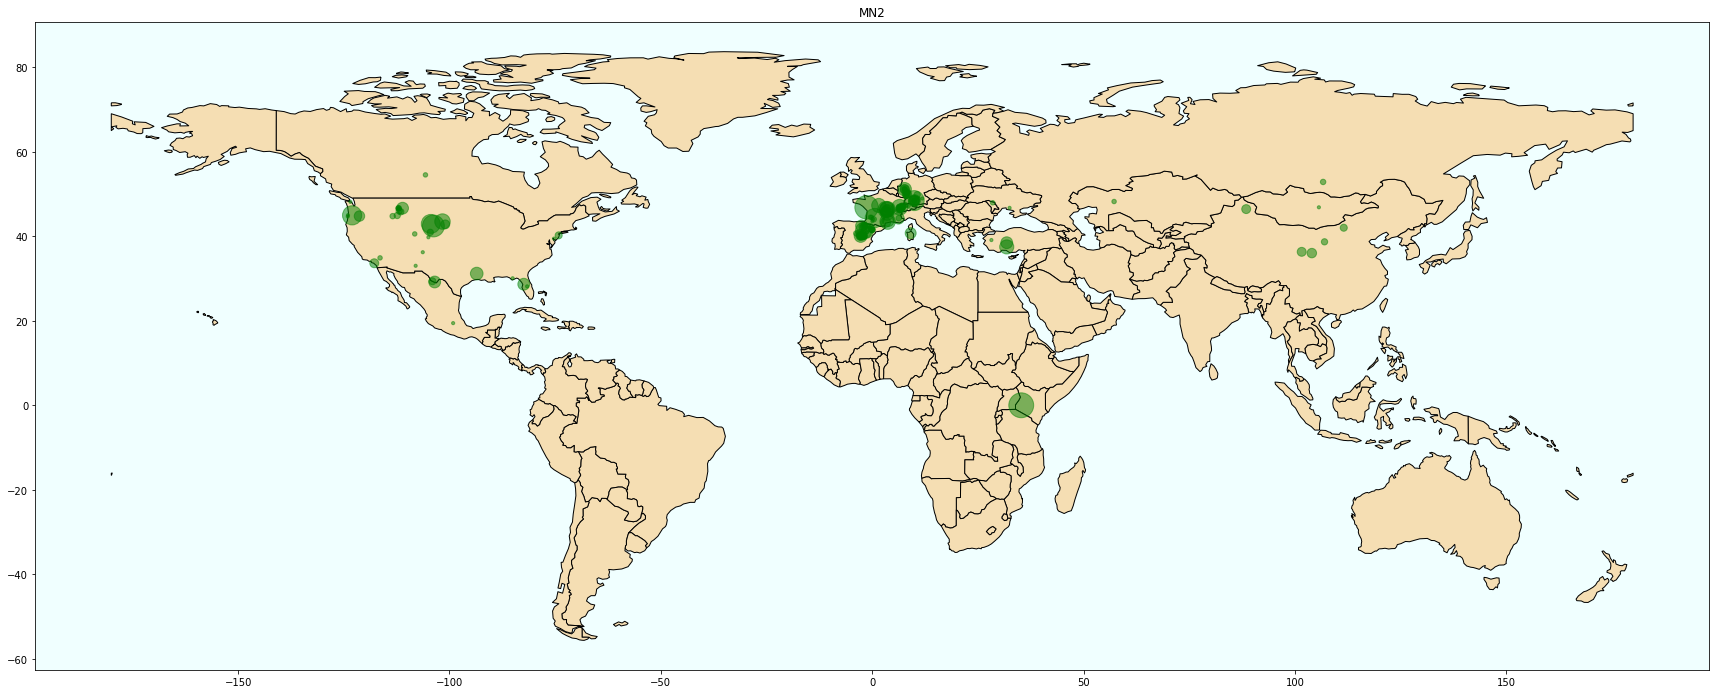

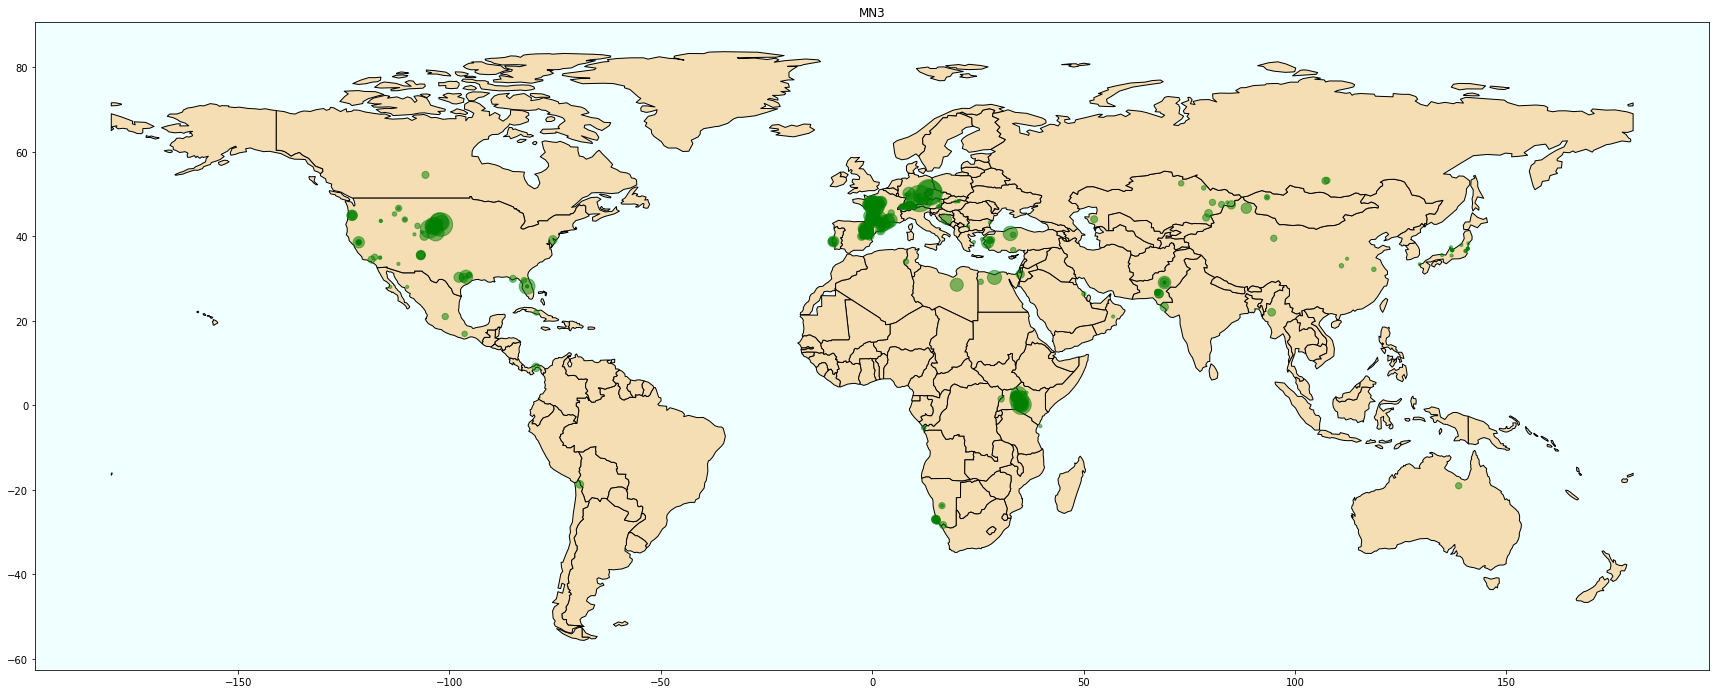

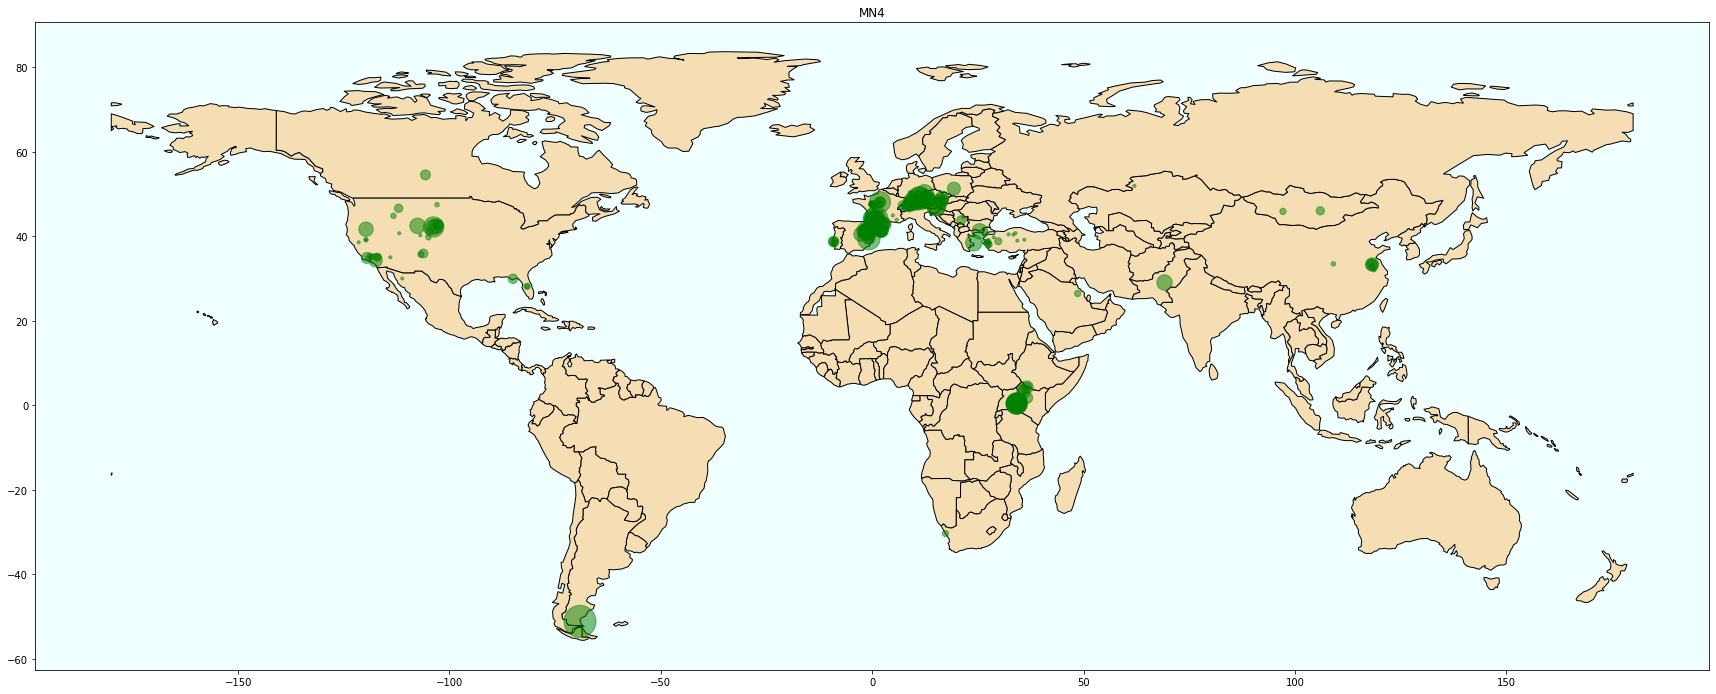

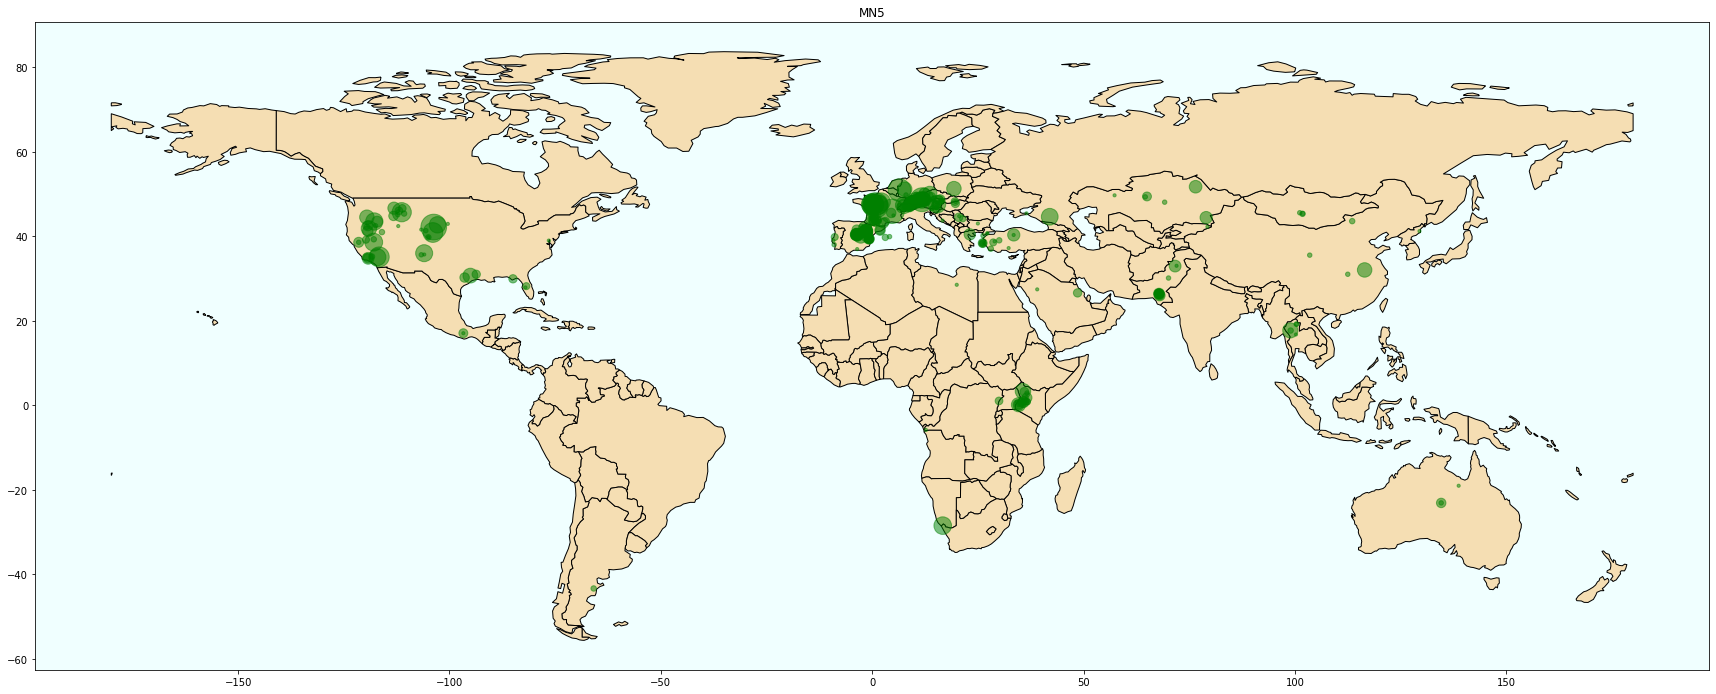

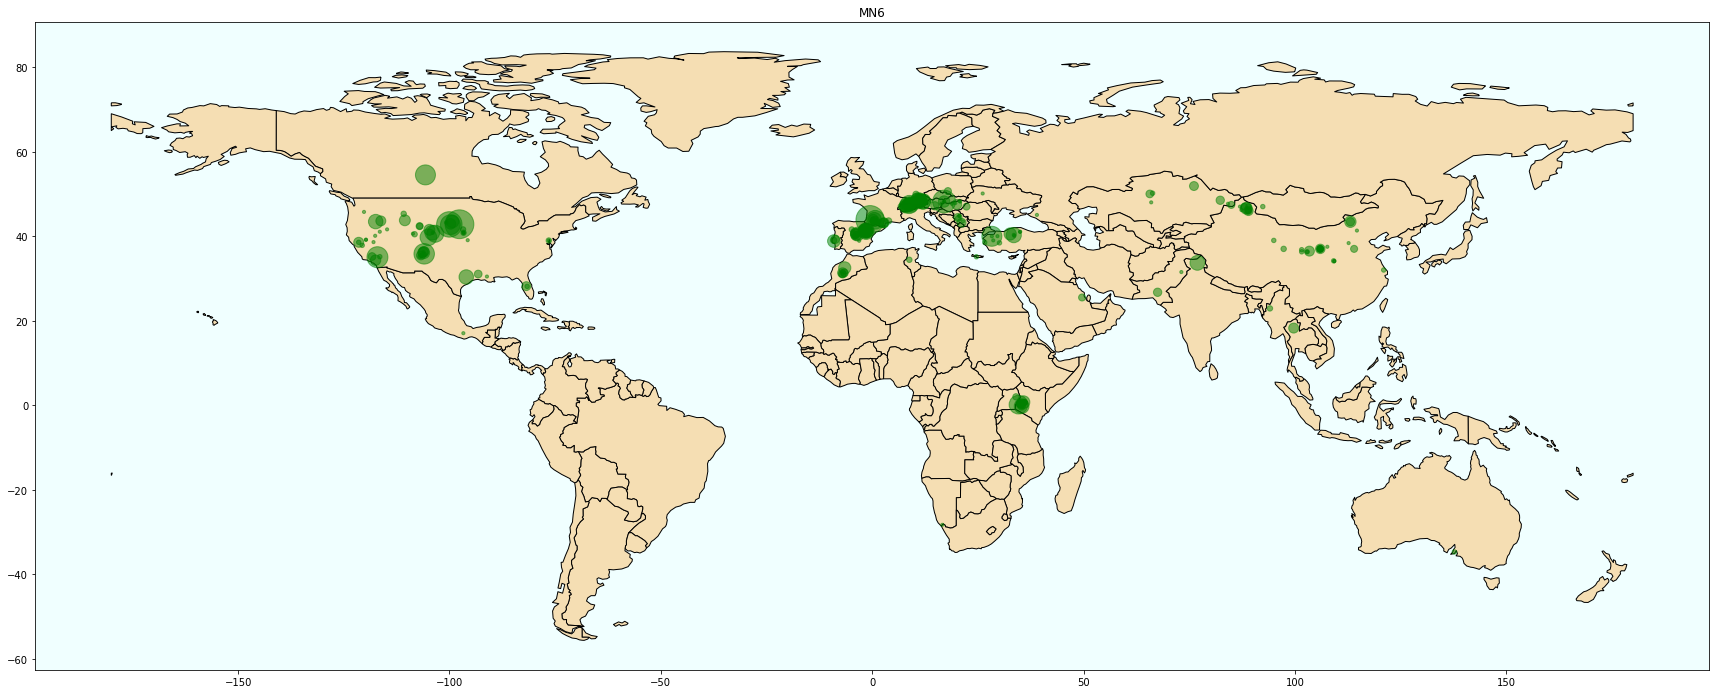

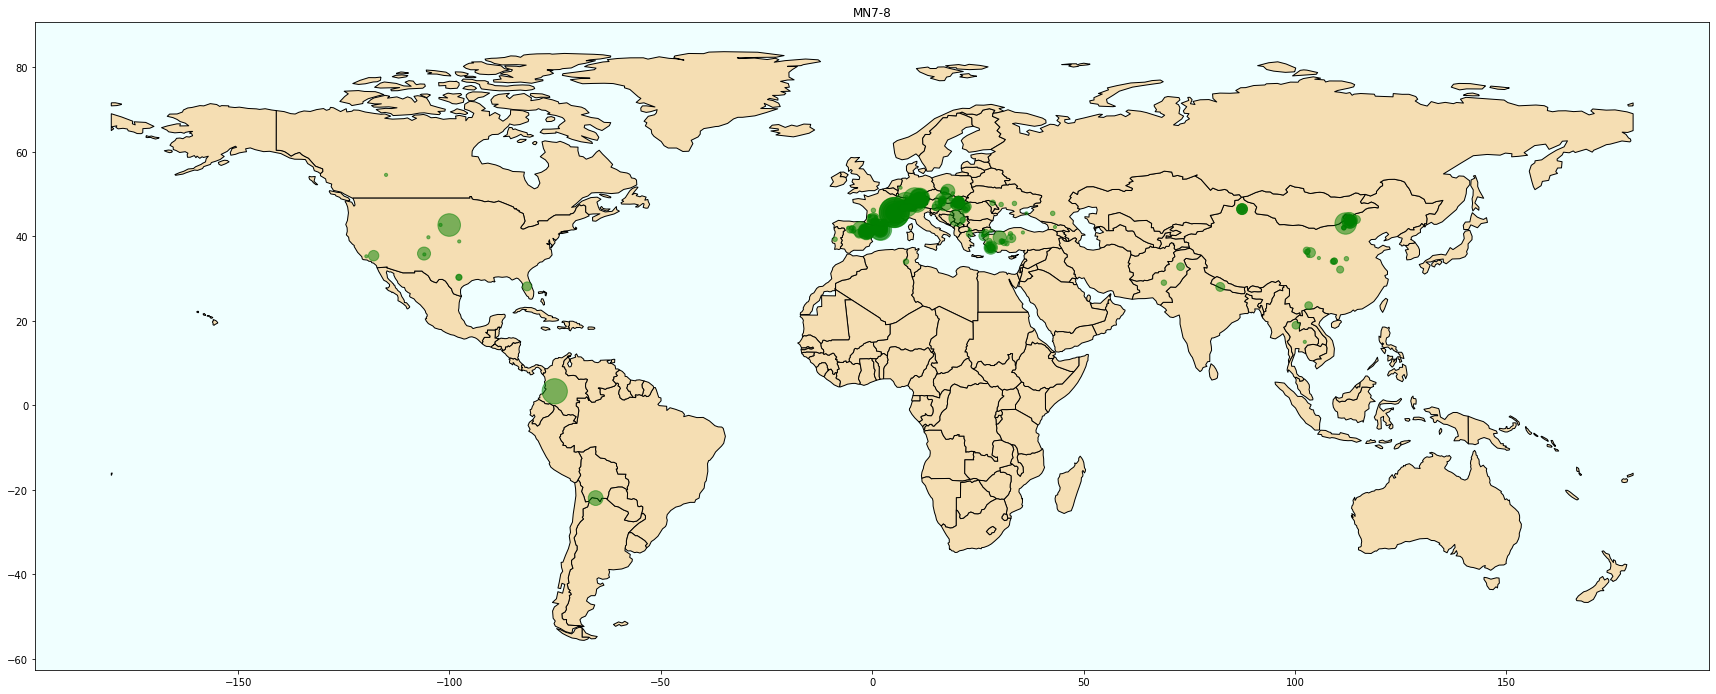

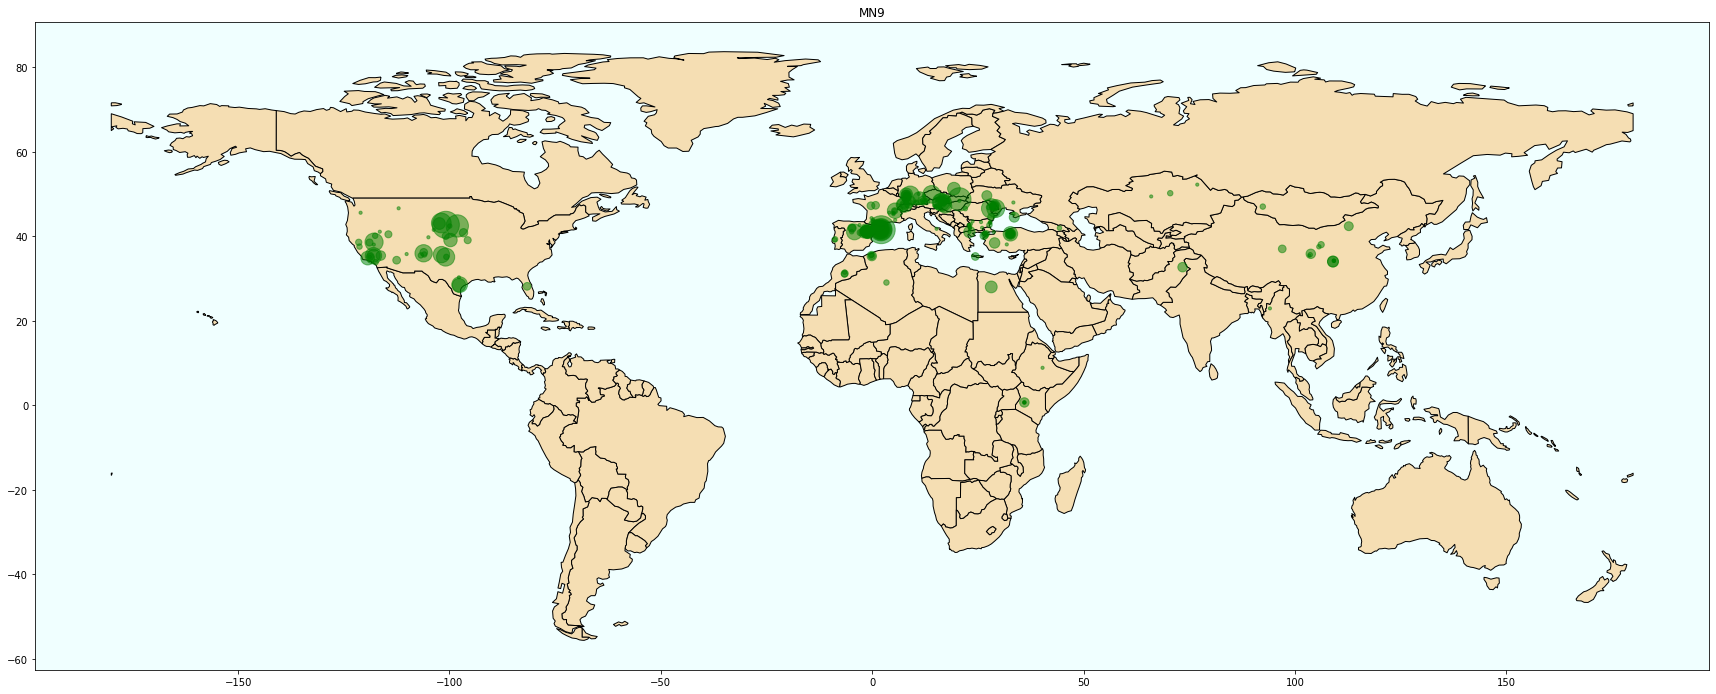

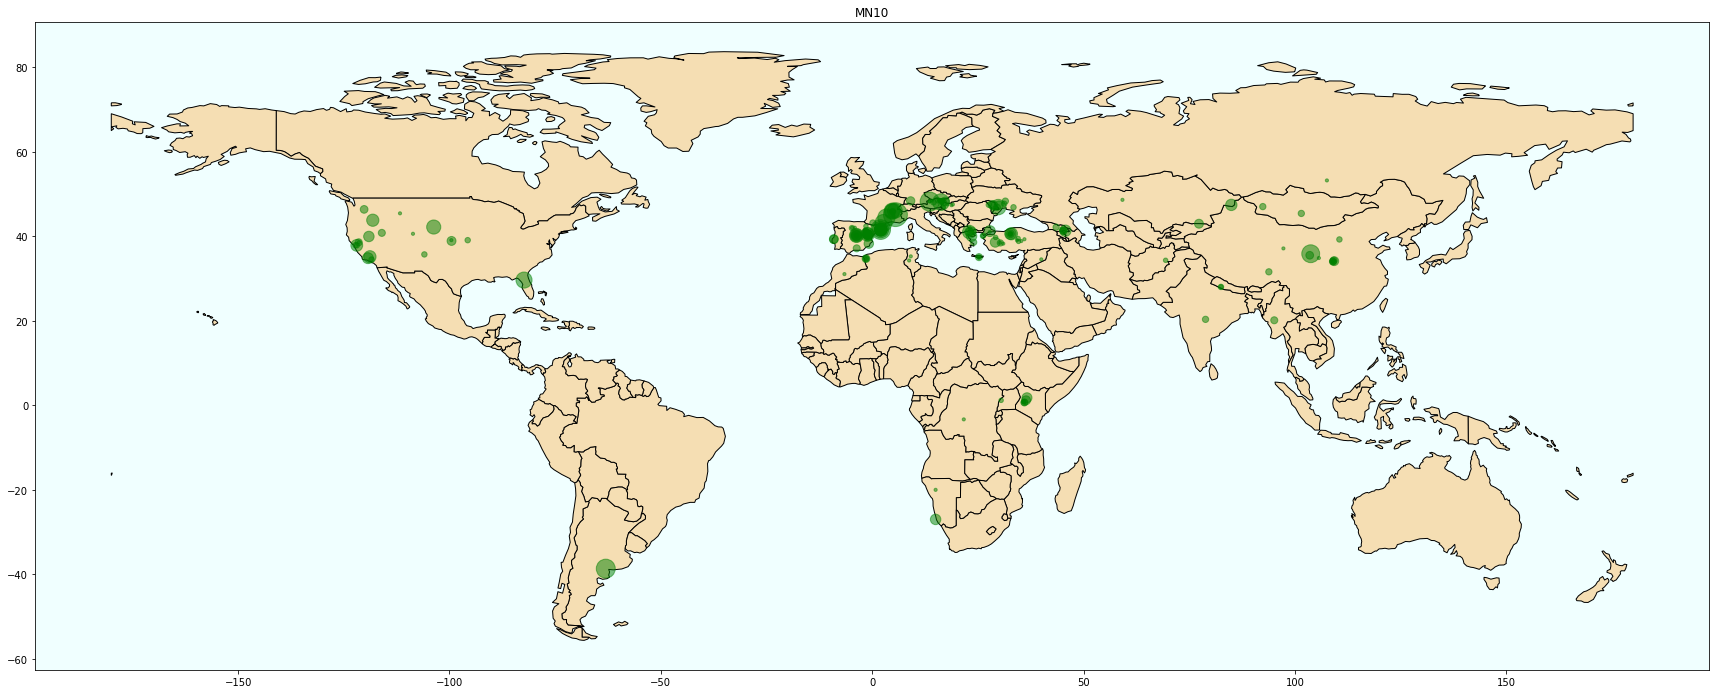

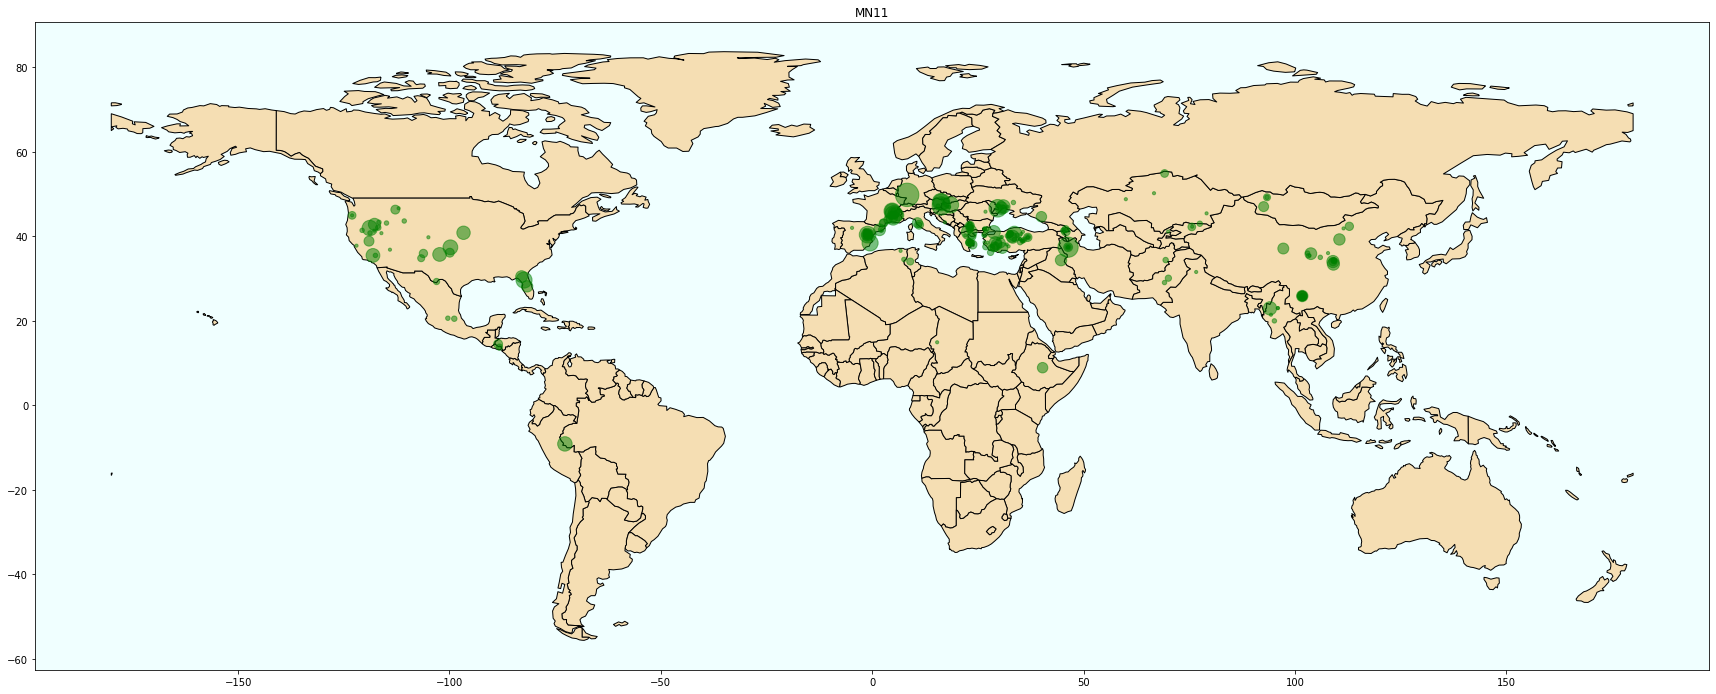

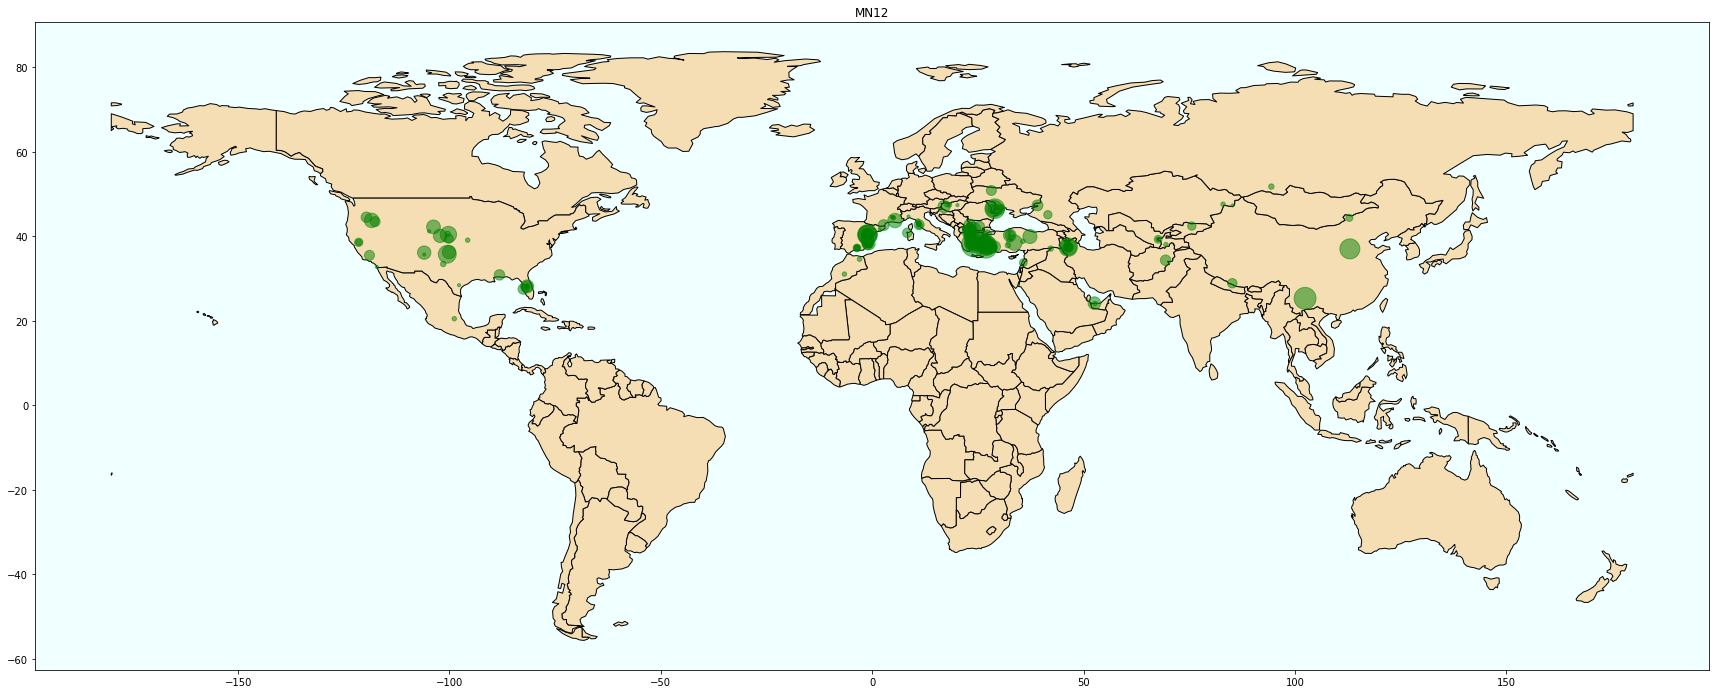

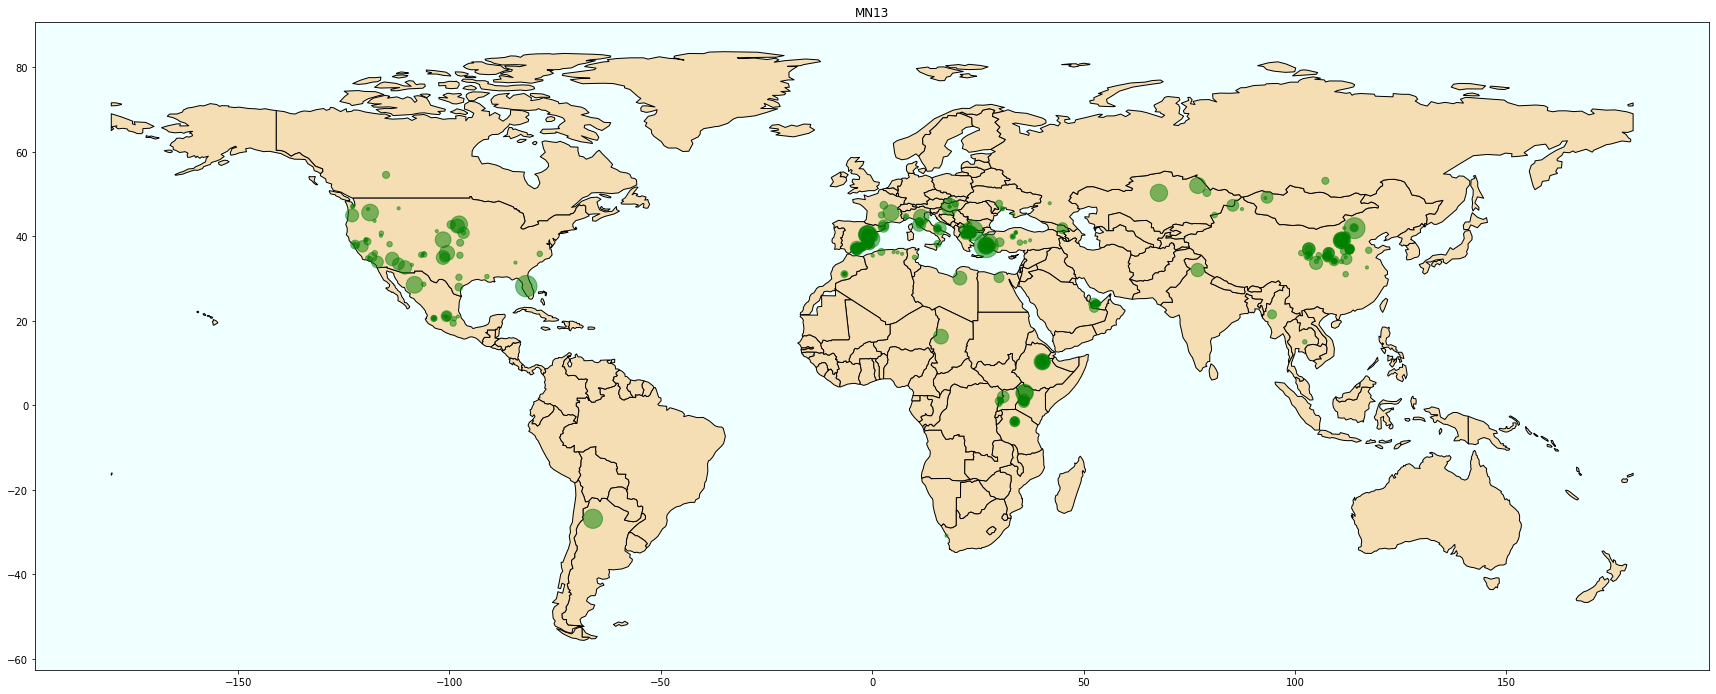

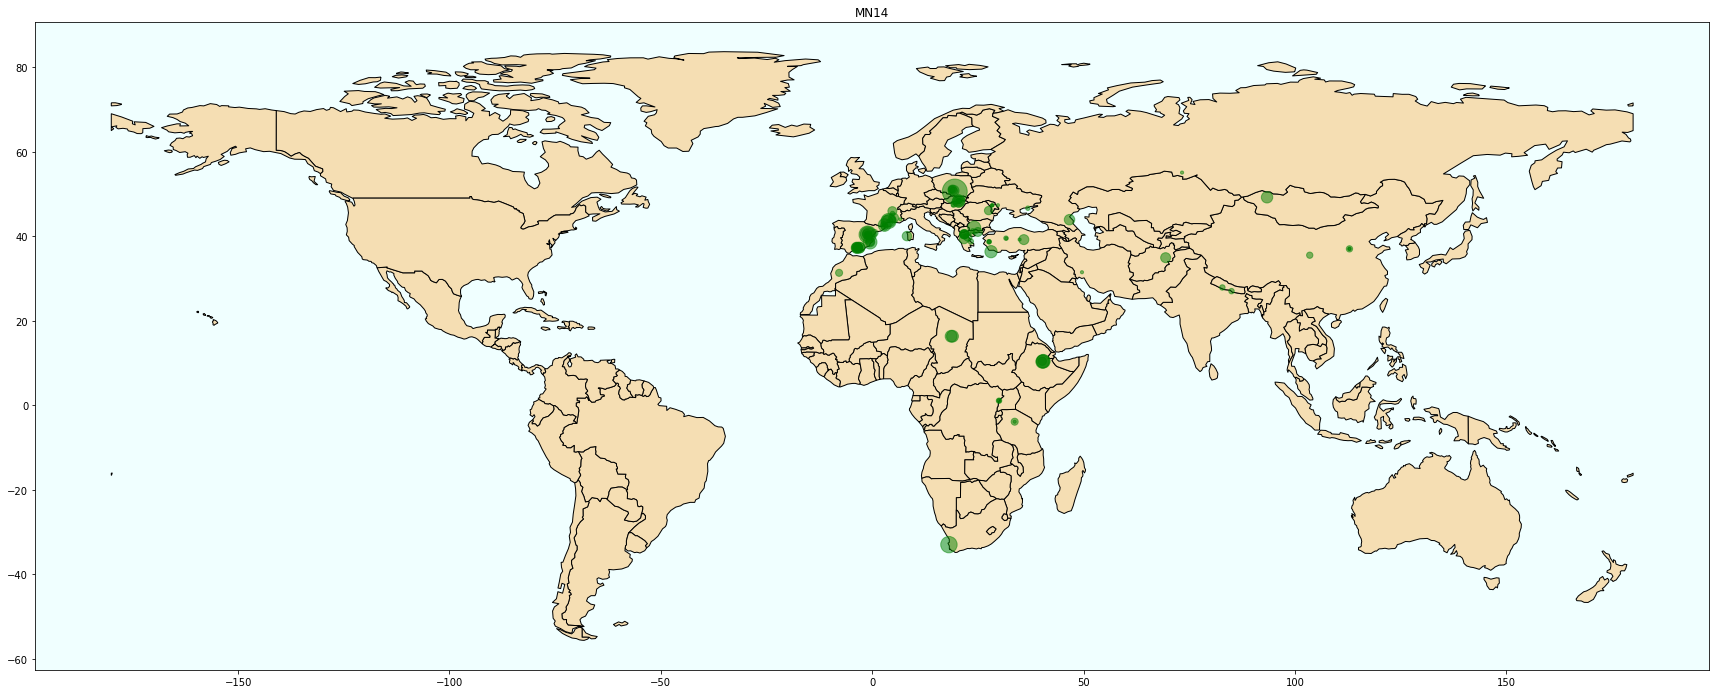

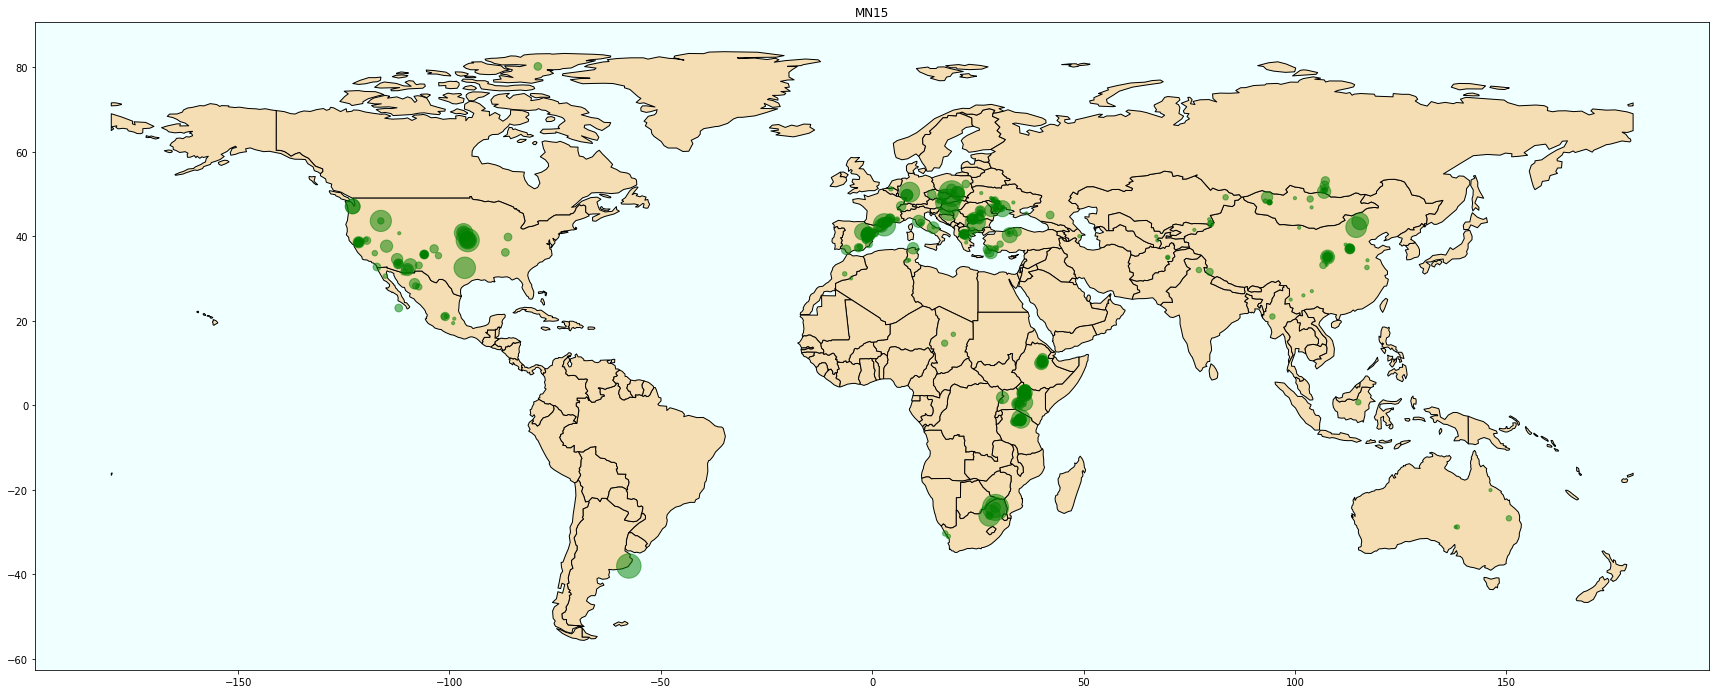

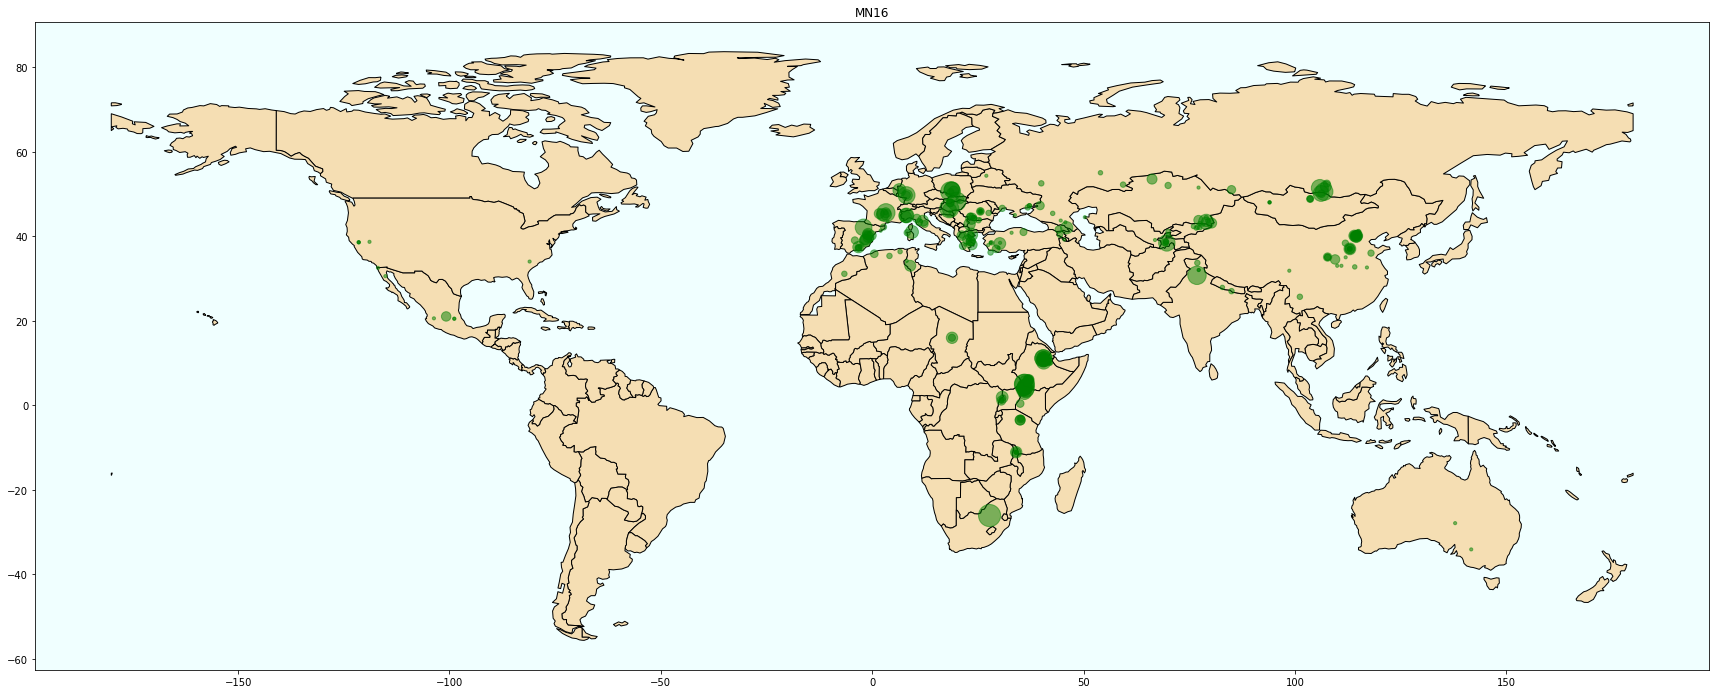

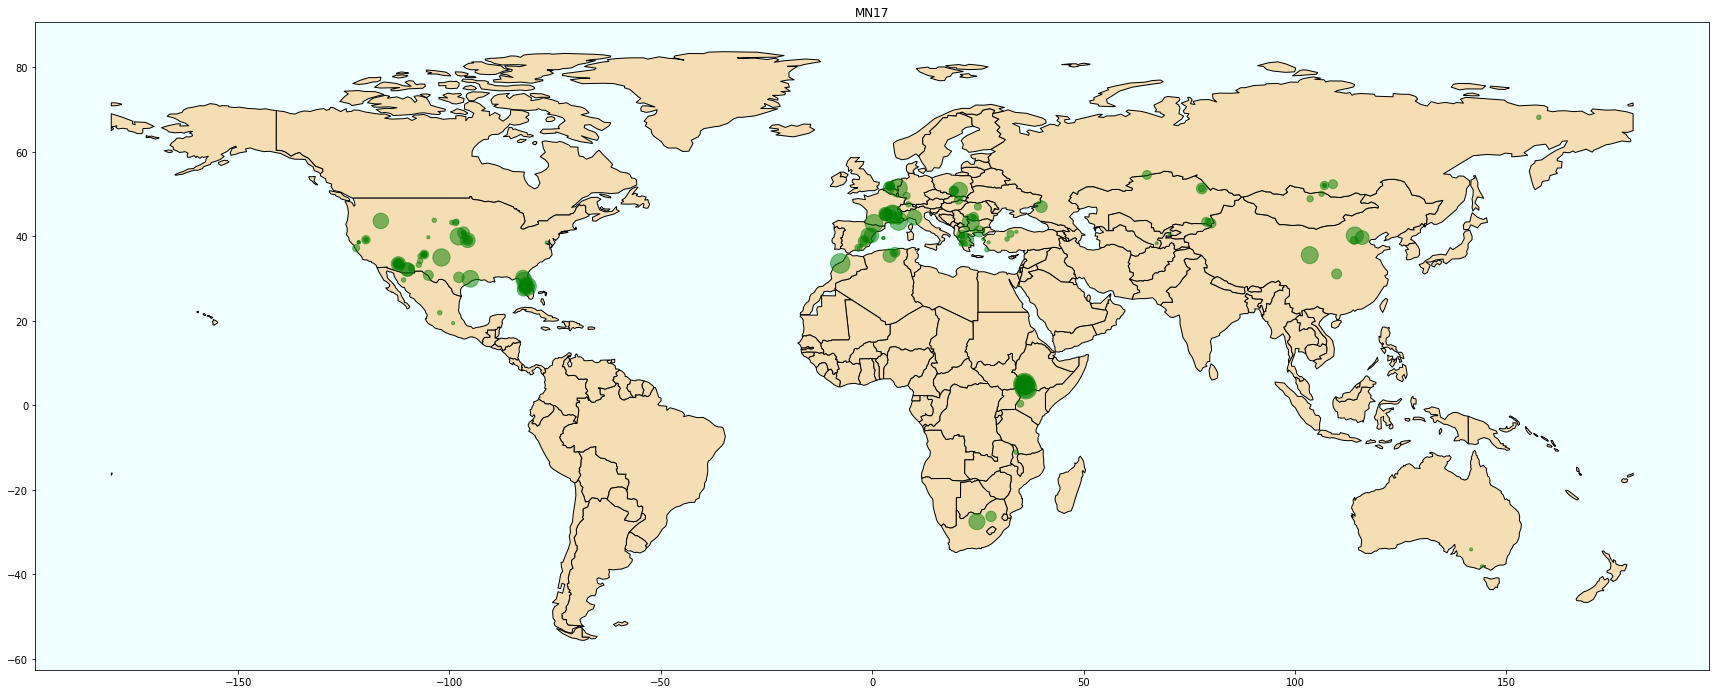

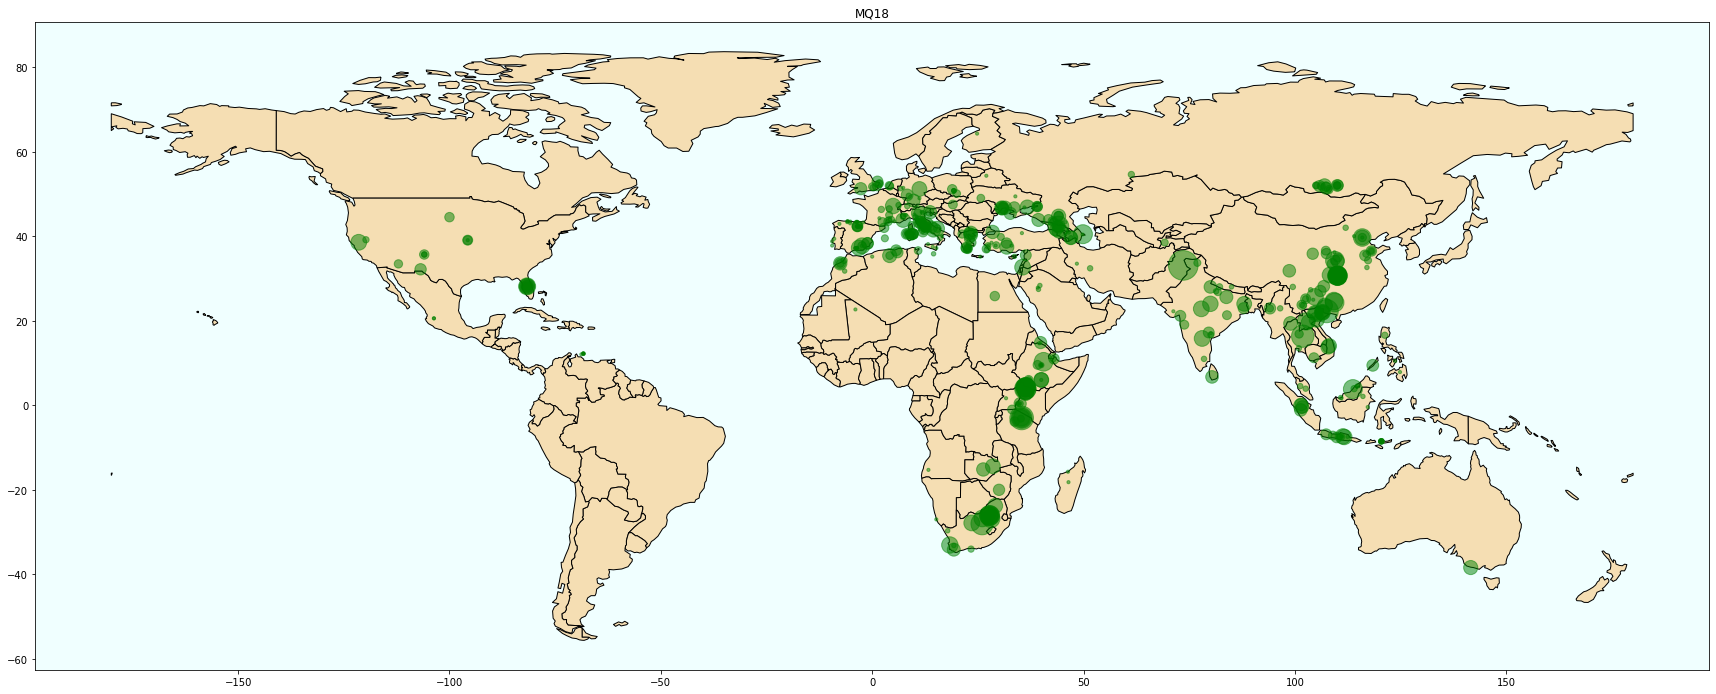

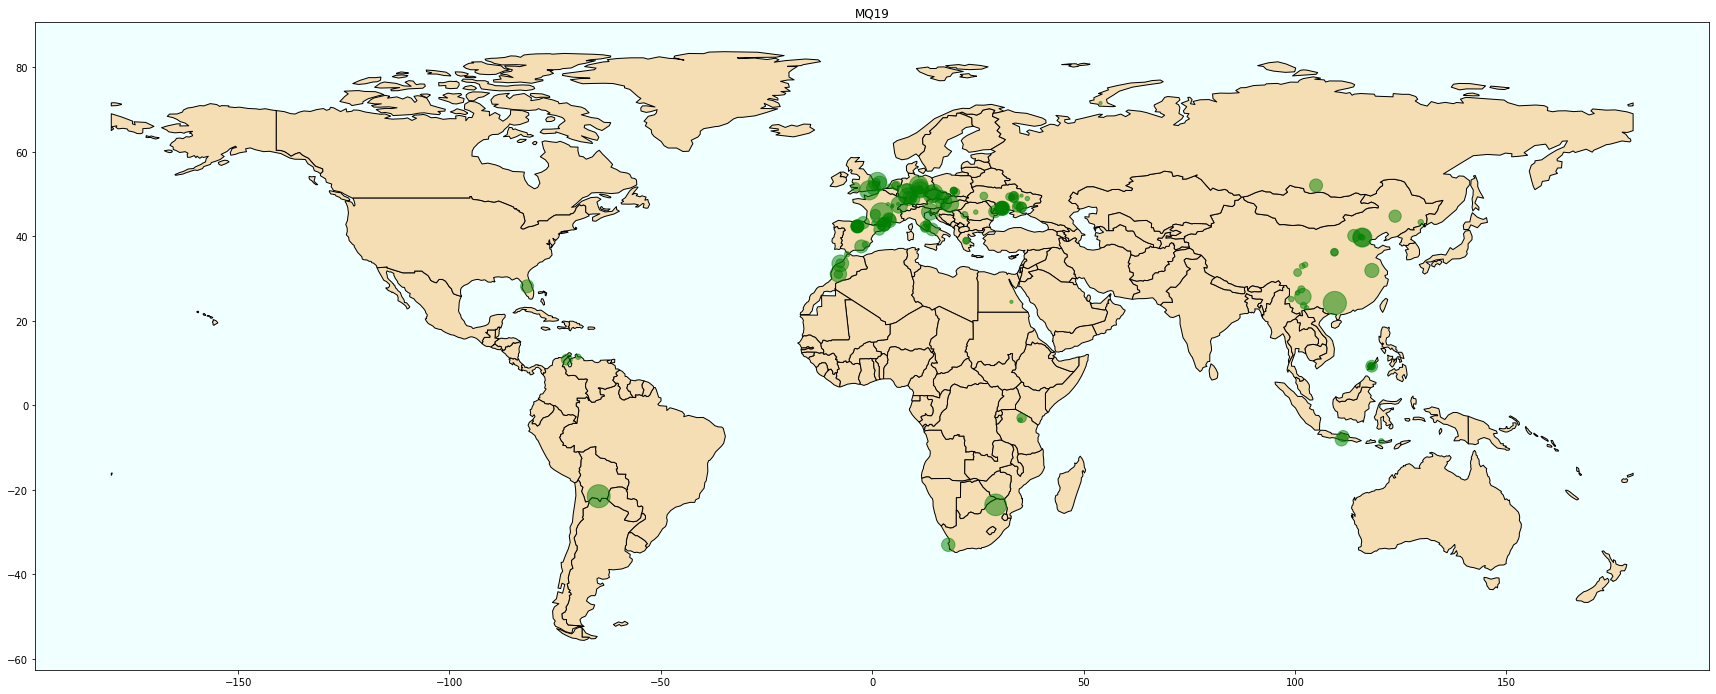

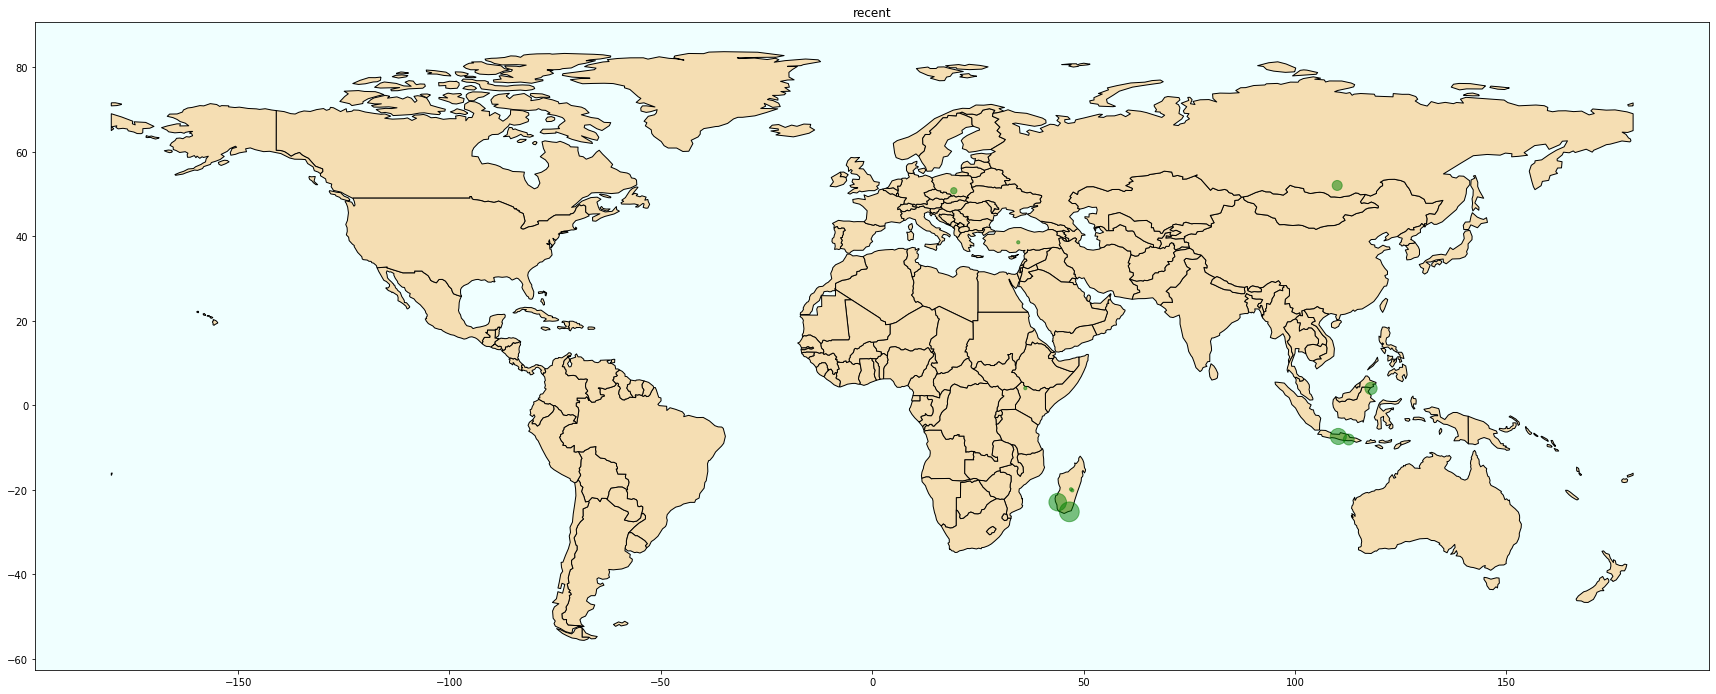

In [3]:
# PLOT LOCALITIES ON A WORLD MAP

#choose map
myMap = world.cx[:,:]

timeUnits = ['old','MN1','MN2','MN3','MN4','MN5','MN6','MN7-8','MN9','MN10','MN11','MN12','MN13','MN14','MN15','MN16','MN17','MQ18','MQ19','recent']

for timeUnit in timeUnits:
    # plot background map 
    fig, ax = plt.subplots(figsize=(30,15))
    myMap.plot(ax=ax, color='wheat', edgecolor='black')

    # plot occurrence coordinates
    x = localityFeatures.loc[localityFeatures['TIMEUNIT']==timeUnit,'LONG']
    y = localityFeatures.loc[localityFeatures['TIMEUNIT']==timeUnit,'LAT']
    plt.scatter(x, y, color='green', alpha=0.5, s=10*localityFeatures.loc[localityFeatures['TIMEUNIT']==timeUnit,'NUMBER OF OCCURRENCES'])

    plt.title(timeUnit)
    #plt.xlim((-25,180))
    ax.set_facecolor('azure')
    plt.show()

In [4]:
localityFeatures.to_csv('../csv/localityFeatures.csv')